### ECE 657A: Data and Knowledge Modeling and Analysis
#### Assignment 2: Data Cleaning and Dimensionality Reduction


**Submitted By Group 21:**<br>

**Ankush Malhotra - 20709477**<br>

**Shreesha Pillangere Ramachandra – 20740615**<br>

**Gunasekaran Marati Saravanan - 20715573**<br>

In [3]:
#Importing libraries :
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from scipy import stats

## Question 2:Parameter Selection and Classification (for dataset B)
### Classify dataset B using four classifiers: k-NN, Support Vector Machine (with RBF kernel), Random Forests and simple Neural Networks (MLPs). The objective is to experiment with parameter selection in training classifiers and to compare the performance of these well- known classification methods.

In [4]:
#Reading "DataDNA.csv" file:
df_b = pd.read_csv('DataDNA.csv')
df_b.head()

,1,2,1.1,2.1,1.2,2.2,3,3.1,3.2,3.3,...,3.8,2.19,3.9,4.6,2.20,2.21,2.22,2.23,1.15,1.16
0,3,3,4,2,1,2,2,4,3,2,...,1,4,3,4,4,4,1,3,4,1
1,4,1,4,4,4,4,1,1,2,1,...,1,2,1,1,4,2,2,4,4,1
2,1,4,1,1,3,3,4,4,3,4,...,1,3,3,4,1,3,3,4,2,-1
3,3,4,4,3,1,1,4,4,4,1,...,3,1,3,2,1,4,2,1,1,-1
4,3,2,3,1,2,3,4,3,1,4,...,2,2,2,3,4,2,2,2,2,-1


In [5]:
df_b.describe()

,1,2,1.1,2.1,1.2,2.2,3,3.1,3.2,3.3,...,3.8,2.19,3.9,4.6,2.20,2.21,2.22,2.23,1.15,1.16
count,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,...,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000
mean,2.493861,2.529786,2.507503,2.527058,2.548431,2.492951,2.549795,2.541155,2.552979,2.564802,...,2.498408,2.497499,2.438836,2.495225,2.482492,2.436107,2.500682,2.456571,2.512960,0.033197
std,1.103734,1.086730,1.097940,1.118978,1.081441,1.099599,1.110029,1.103808,1.126967,1.108433,...,1.104986,1.070690,1.093767,1.087128,1.065865,1.089860,1.092149,1.093367,1.086224,0.999676
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,-1.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,1.000000
75%,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


### 1. Preprocess the given data using the Z-score normalization on the data. Justify the choice of Z-score Normalization here, as opposed to min-max normalization. Why do you need normalization in general? Justify why you would normally split the test and training set randomly. What is the distribution of the +1,-1 classes in the dataset?

### Preprocess the given data using the Z-score normalization on the data.

In [6]:
df_y = df_b['1.16']
df_z = df_b.drop('1.16', axis=1)
#Importing required library:
from sklearn.preprocessing import StandardScaler
#Instantiating the function
z_score_scaler = StandardScaler()

z_score_transf = z_score_scaler.fit_transform(df_z)
z_score_transf

#Preparing dataframe
z_score_scaled_features_df = pd.DataFrame(z_score_transf, index=df_z.index, columns=df_z.columns)
z_score_scaled_features_df['1.16']=df_y
z_score_scaled_features_df.head()

C:\Users\Ankush\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ankush\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,1,2,1.1,2.1,1.2,2.2,3,3.1,3.2,3.3,...,3.8,2.19,3.9,4.6,2.20,2.21,2.22,2.23,1.15,1.16
0,0.458674,0.432785,1.359670,-0.471124,-1.432148,-0.448403,-0.495411,1.321948,0.396749,-0.509666,...,-1.356351,1.403621,0.513173,1.384490,1.424058,1.435275,-1.374377,0.497136,1.369311,1
1,1.364896,-1.408017,1.359670,1.316628,1.342560,1.370856,-1.396493,-1.396534,-0.490790,-1.412046,...,-1.356351,-0.464758,-1.315786,-1.375703,1.424058,-0.400241,-0.458542,1.411950,1.369311,1
2,-1.353769,1.353186,-1.373342,-1.365001,0.417657,0.461226,1.306754,1.321948,0.396749,1.295093,...,-1.356351,0.469431,0.513173,1.384490,-1.391199,0.517517,0.457293,1.411950,-0.472349,-1
3,0.458674,1.353186,1.359670,0.422752,-1.432148,-1.358032,1.306754,1.321948,1.284289,-1.412046,...,0.454038,-1.398948,0.513173,-0.455639,-1.391199,1.435275,-0.458542,-1.332492,-1.393179,-1
4,0.458674,-0.487616,0.448666,-1.365001,-0.507245,0.461226,1.306754,0.415787,-1.378330,1.295093,...,-0.451157,-0.464758,-0.401306,0.464425,1.424058,-0.400241,-0.458542,-0.417678,-0.472349,-1


### Justify the choice of Z-score Normalization here, as opposed to min-max normalization. 

### Ans. Z-score Normalization works well in this scenario since we get consistent mean-centred features with a unit scale variance. Also, our features are almost normally distributed. On the other hand, Min-Max scalar is sensitive to outliers and is used when distribution is non-Gaussian with small variance or standard deviation.

### Why do you need normalization in general?

### Ans. The prime objective of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. The objective functions of various machine learning classifiers are based on Euclidean distance, so if one of the feature has bigger values, this feature's distance will dominate the other features. As a result, the range of all the features should be changed by normalization so that each feature contributes equally (approx.) to the final distance. Furthermore, gradient descent converges faster with scaled features.

### Justify why you would normally split the test and training set randomly.

### Ans. We normally split the test and training set randomly to make sure there is no sampling bias introduced while training the data and testing it later. This also reduces the risk of having an overfitted model in the long run.

### What is the distribution of the +1,-1 classes in the dataset?¶

C:\Users\Ankush\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


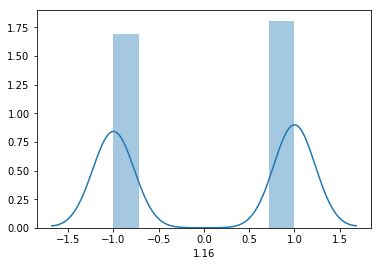

In [7]:
sns.distplot(z_score_scaled_features_df['1.16'])

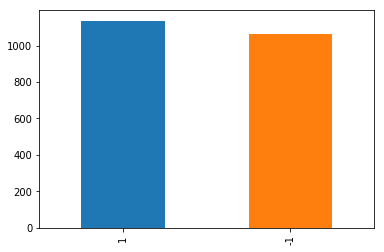

In [8]:
z_score_scaled_features_df['1.16'].value_counts().plot(kind='bar')

In [9]:
z_score_scaled_features_df['1.16'].value_counts()

 1    1136
-1    1063
Name: 1.16, dtype: int64

### Ans. We can say that both the classes are equally distributed without having any majority or minority class. From the distribution plot above we can infer the classes are normally distributed.

### 2. Parameter Selection:

### (a) For k-NN you need to evaluate the best value k to use. Using 5-fold cross validation on the training set evaluate k-NN on the values k=[1, 3, 5, 7, , 31]. The following link can be helpful:  https://scikit-learn.org/stable/modules/cross_validation.html
### Plot a figure that shows the relationship between the accuracy and the parameter k. Report the best k in terms of classification accuracy. Explain why you didnt evaluate directly on the test set.

In [10]:
from sklearn.model_selection import train_test_split
X = z_score_scaled_features_df.copy()
X.drop('1.16',axis=1,inplace=True)
y = df_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
Accuracy_kNN = []
for i in range(1,33,2):
    kNN = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(kNN, X_train, y_train, cv=5, scoring='accuracy')
    Accuracy_kNN.append(np.average(scores))                                              

Text(0, 0.5, 'Accuracy')

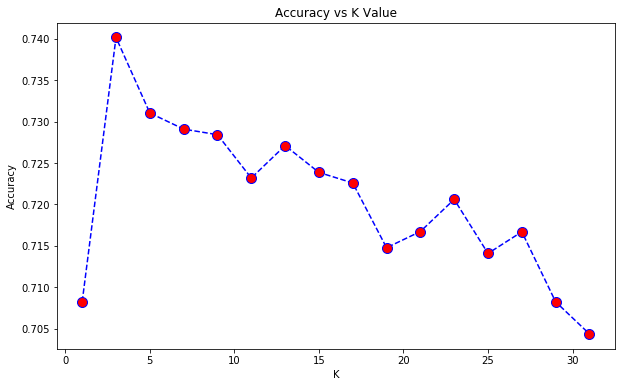

In [12]:
#Plotting K with Accuracy rate:
plt.figure(figsize=(10,6))
plt.plot(range(1,33,2),Accuracy_kNN,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=10)
plt.title('Accuracy vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

### Ans. Best k in terms of classification accuracy is k=3.
### We didn't evaluate directly on the test set because there is always a risk of overfitting on the test set i.e. knowledge about test set can hamper the model and the evaluation metric would no longer report on a generalizated scale.

### (b) For the RBF kernel SVM, there are two parameters to be decided: the soft margin penalty term "c" and the kernel width parameter "sigma". Again use 5-fold cross validation on the training set to select the parameter "c" from the set [0.1, 0.5, 1, 2, 5,10, 20, 50] and select the parameter "sigma" from the set [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]. Report the best parameters in terms of classication accuracy including plotting the ROC curves.

In [13]:
from sklearn.svm import SVC
svm_rbf = SVC(kernel='linear',random_state=0)

In [14]:
from sklearn.model_selection import GridSearchCV
paramters = [{'C':[0.1, 0.5, 1, 2, 5,10, 20, 50],'kernel':['rbf'],'gamma':[0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]}]

In [15]:
grid_search = GridSearchCV(estimator=svm_rbf,param_grid=paramters,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_model = grid_search.fit(X_train,y_train)
accuracy_grid = grid_search.best_score_

In [16]:
accuracy_grid

0.8888888888888888

In [17]:
# Best parameter in terms of classification accuracy:
grid_search_model.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [18]:
from sklearn.svm import SVC
svm_rbf_final = SVC(kernel='rbf',C=10,gamma=0.01,random_state=0)
svm_rbf_final.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
pred_svm = svm_rbf_final.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred_svm))

0.906060606060606


In [20]:
#Roc curve:
from sklearn.metrics import roc_curve
roc_curve(y_test,pred_svm)

(array([0.        , 0.07278481, 1.        ]),
 array([0.        , 0.88662791, 1.        ]),
 array([ 2,  1, -1], dtype=int64))

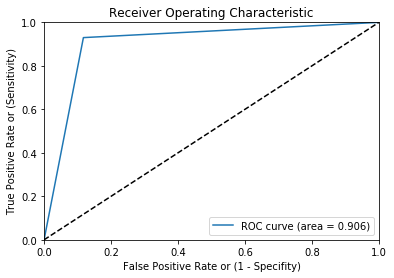

In [21]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(pred_svm,y_test)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

### 3. Train (at least) six classifiers and report the results:
### (a) Classify the test set using k-NN, SVM, Random Forests and Neural Networks. Use the chosen parameters from the parameter selection process in question 2 for k-NN and SVM. For the next two classifiers use the default setups listed at the end for Random Forests and Neural Networks.

In [31]:
#Training kNN with K=3 selected from question 2:
kNN_3 = KNeighborsClassifier(n_neighbors=3)
scores_3 = cross_val_score(kNN_3, X_train, y_train, cv=5, scoring='accuracy')
np.average(scores_3)

0.7401473704183928

In [32]:
kNN_3.fit(X_train, y_train)
pred_kNN_3 =kNN_3.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test,pred_kNN_3))
print(accuracy_score(y_test,pred_kNN_3))

              precision    recall  f1-score   support

          -1       0.66      0.95      0.78       316
           1       0.93      0.56      0.70       344

   micro avg       0.75      0.75      0.75       660
   macro avg       0.80      0.76      0.74       660
weighted avg       0.80      0.75      0.74       660

0.746969696969697


In [33]:
#Training SVM with kernel='rbf', C=10, gamma=0.01 
from sklearn.svm import SVC
svm_rbf = SVC(kernel='rbf',C=10,gamma=0.01,random_state=0)
svm_rbf.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
pred_svm_pre = svm_rbf.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test,pred_svm_pre))
print(accuracy_score(y_test,pred_svm_pre))

              precision    recall  f1-score   support

          -1       0.88      0.93      0.90       316
           1       0.93      0.89      0.91       344

   micro avg       0.91      0.91      0.91       660
   macro avg       0.91      0.91      0.91       660
weighted avg       0.91      0.91      0.91       660

0.906060606060606


In [37]:
#Training Random Forest with default paramters:
from sklearn.ensemble import RandomForestClassifier
clf_rand = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf_rand.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [39]:
pred_random = clf_rand.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test,pred_random))
print(accuracy_score(y_test,pred_random))

              precision    recall  f1-score   support

          -1       0.88      0.92      0.90       316
           1       0.93      0.88      0.90       344

   micro avg       0.90      0.90      0.90       660
   macro avg       0.90      0.90      0.90       660
weighted avg       0.90      0.90      0.90       660

0.9030303030303031


In [ ]:
#Training default neural network:
